Accuracy: 0.83

Classification Report:
              precision    recall  f1-score   support

          No       0.67      1.00      0.80         2
         Yes       1.00      0.75      0.86         4

    accuracy                           0.83         6
   macro avg       0.83      0.88      0.83         6
weighted avg       0.89      0.83      0.84         6



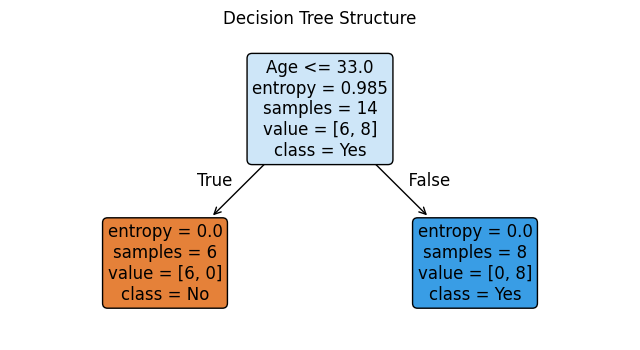

In [50]:
# Practical 5 - Decision Tree

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

age = np.array([25, 30, 45, 35, 22, 23, 43, 36, 29, 50,  31, 38, 33, 27, 40, 42, 48, 39, 26, 34])
income = np.array([50000, 60000, 80000, 75000, 48000, 52000,  79000, 72000, 61000, 90000, 65000, 68000, 70000, 58000, 77000, 81000, 85000, 73000, 54000, 69000])
bought = np.array([0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1])

x = np.column_stack((age, income))
y = bought  

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42, stratify=y)

clf = DecisionTreeClassifier(max_depth=3, random_state=42, criterion='entropy')
clf.fit(x_train, y_train)
y_prediction = clf.predict(x_test)
accuracy = accuracy_score(y_test, y_prediction)
print(f"Accuracy: {accuracy:.2f}")

print("\nClassification Report:")
print(classification_report(y_test, y_prediction, target_names=['No', 'Yes']))

plt.figure(figsize=(8,4))
plot_tree(
    clf, 
    feature_names=['Age', 'Income'], 
    class_names=['No', 'Yes'],
    filled=True, 
    rounded=True,
    fontsize=12
)
plt.title('Decision Tree Structure')
plt.show()

Accuracy: 0.798883%

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.88      0.84       105
           1       0.80      0.69      0.74        74

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179



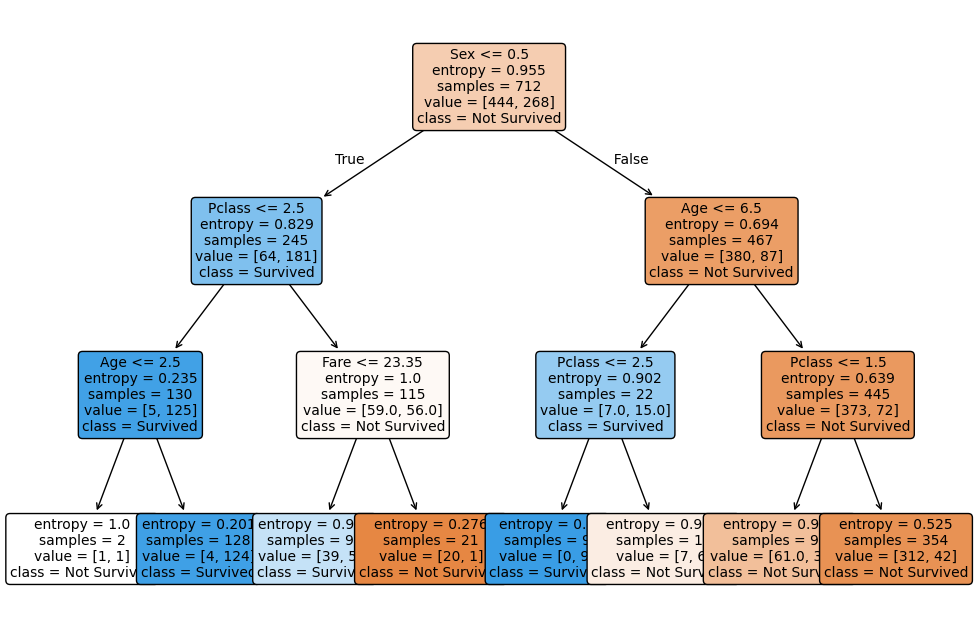

In [49]:
# Dataset 1 - Titanic

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

df = pd.read_csv('titanic.csv')
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
df = df[['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked']]

le_sex = LabelEncoder()
le_embarked = LabelEncoder()
df['Sex'] = le_sex.fit_transform(df['Sex'])
df['Embarked'] = le_embarked.fit_transform(df['Embarked'])

x = df.drop('Survived', axis=1)
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dt_classifier = DecisionTreeClassifier(random_state=42, criterion='entropy', max_depth=3)
dt_classifier.fit(X_train, y_train)
y_pred = dt_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy:2f}%\n')
print('Classification Report:')
print(classification_report(y_test, y_pred))

plt.figure(figsize=(12, 8))
plot_tree(
    dt_classifier,
    feature_names=X.columns,
    class_names=['Not Survived', 'Survived'],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.show()

Accuracy: 0.70

Classification Report:
              precision    recall  f1-score   support

           0       0.70      1.00      0.82      7048
           1       0.00      0.00      0.00      3021

    accuracy                           0.70     10069
   macro avg       0.35      0.50      0.41     10069
weighted avg       0.49      0.70      0.58     10069



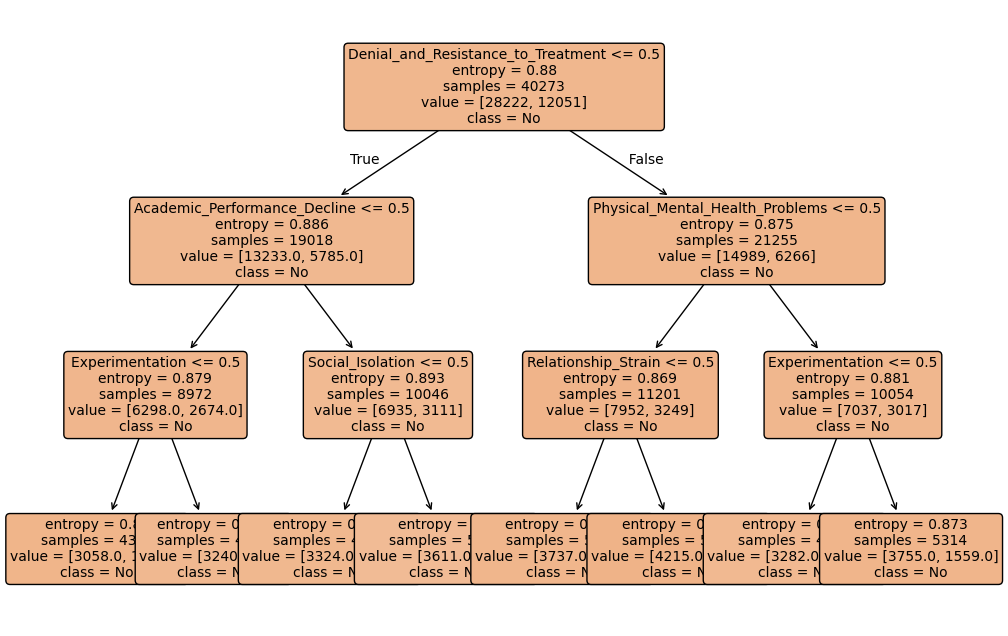

In [55]:
# Dataset 2 - Student Drug Addiction

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

df = pd.read_csv('addiction.csv')
categorical_features = [
    'Experimentation',
    'Academic_Performance_Decline',
    'Social_Isolation',
    'Financial_Issues',
    'Physical_Mental_Health_Problems',
    'Legal_Consequences',
    'Relationship_Strain',
    'Risk_Taking_Behavior',
    'Withdrawal_Symptoms',
    'Denial_and_Resistance_to_Treatment'
]

for feature in categorical_features:
    df[feature] = df[feature].fillna(df[feature].mode()[0])

# Select relevant features and target
df = df[['Addiction_Class', 
         'Experimentation', 
         'Academic_Performance_Decline', 
         'Social_Isolation', 
         'Financial_Issues', 
         'Physical_Mental_Health_Problems', 
         'Legal_Consequences', 
         'Relationship_Strain', 
         'Risk_Taking_Behavior', 
         'Withdrawal_Symptoms', 
         'Denial_and_Resistance_to_Treatment']]

le_experimentation = LabelEncoder()
le_academic = LabelEncoder()
le_social = LabelEncoder()
le_financial = LabelEncoder()
le_health = LabelEncoder()
le_legal = LabelEncoder()
le_relationship = LabelEncoder()
le_risk = LabelEncoder()
le_withdrawal = LabelEncoder()
le_denial = LabelEncoder()
le_addiction = LabelEncoder()

df['Experimentation'] = le_experimentation.fit_transform(df['Experimentation'])
df['Academic_Performance_Decline'] = le_academic.fit_transform(df['Academic_Performance_Decline'])
df['Social_Isolation'] = le_social.fit_transform(df['Social_Isolation'])
df['Financial_Issues'] = le_financial.fit_transform(df['Financial_Issues'])
df['Physical_Mental_Health_Problems'] = le_health.fit_transform(df['Physical_Mental_Health_Problems'])
df['Legal_Consequences'] = le_legal.fit_transform(df['Legal_Consequences'])
df['Relationship_Strain'] = le_relationship.fit_transform(df['Relationship_Strain'])
df['Risk_Taking_Behavior'] = le_risk.fit_transform(df['Risk_Taking_Behavior'])
df['Withdrawal_Symptoms'] = le_withdrawal.fit_transform(df['Withdrawal_Symptoms'])
df['Denial_and_Resistance_to_Treatment'] = le_denial.fit_transform(df['Denial_and_Resistance_to_Treatment'])
df['Addiction_Class'] = le_addiction.fit_transform(df['Addiction_Class'])

# Features and target
X = df.drop('Addiction_Class', axis=1)
y = df['Addiction_Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dt_classifier = DecisionTreeClassifier(random_state=42, criterion='entropy', max_depth=3)
dt_classifier.fit(X_train, y_train)
y_pred = dt_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}\n')
print('Classification Report:')
print(classification_report(y_test, y_pred, zero_division=0))

plt.figure(figsize=(12, 8))
plot_tree(
    dt_classifier,
    feature_names=X.columns,
    class_names=le_addiction.classes_,
    filled=True,
    rounded=True,
    fontsize=10
)
plt.show()

Accuracy: 0.97

Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        17
           1       1.00      0.94      0.97        17

    accuracy                           0.97        34
   macro avg       0.97      0.97      0.97        34
weighted avg       0.97      0.97      0.97        34



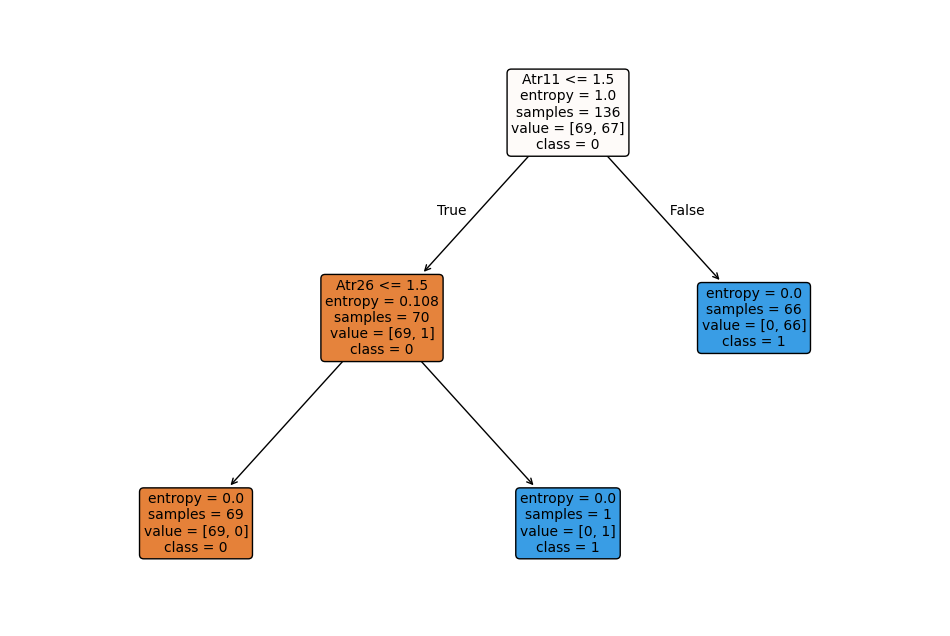

In [11]:
# Dataset 3 - Divorce Prediction

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

df = pd.read_csv('divorce.csv', delimiter=';')

categorical_features = [f'Atr{i}' for i in range(1, 54)]
for feature in categorical_features:
    if df[feature].isnull().sum() > 0:
        df[feature].fillna(df[feature].mode()[0], inplace=True)

df = df[['Class'] + categorical_features]

le = LabelEncoder()
for column in categorical_features + ['Class']:
    df[column] = le.fit_transform(df[column])

X = df.drop('Class', axis=1)
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
dt_classifier = DecisionTreeClassifier(
    random_state=42,
    criterion='entropy'
)
dt_classifier.fit(X_train, y_train)
y_pred = dt_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}\n')
print('Classification Report:')
print(classification_report(y_test, y_pred, zero_division=0))

plt.figure(figsize=(12, 8))
plot_tree(
    dt_classifier,
    feature_names=X.columns,
    class_names=[str(cls) for cls in le.classes_],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.show()